<a href="https://colab.research.google.com/github/ShriKrishna31/NLP-Project/blob/main/Summarization_of_Youtube_Video_to_Tamil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 4.7 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 56.8 MB/s 
     |████████████████████████████████| 6.6 MB 40.2 MB/s 
     |████████████████████████████████| 101 kB 8.5 MB/s 


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [ ]:
youtube_video = "https://www.youtube.com/watch?v=HS5Ns9aCYrA"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'HS5Ns9aCYrA'

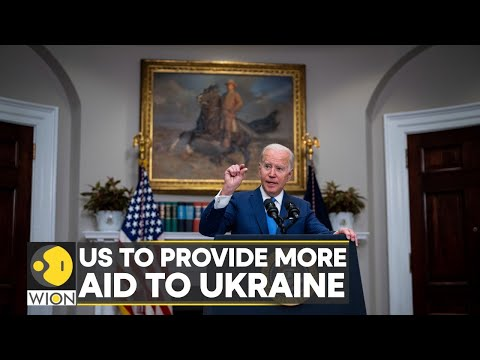

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'duration': 3.36,
  'start': 0.0,
  'text': "now let's get the latest from russian"},
 {'duration': 4.561,
  'start': 1.599,
  'text': 'invasion of ukraine which is stepping'},
 {'duration': 5.12,
  'start': 3.36,
  'text': 'into its sixth month yet there is no'},
 {'duration': 4.88,
  'start': 6.16,
  'text': 'sign of the war coming to an end while'},
 {'duration': 4.88, 'start': 8.48, 'text': 'russian forces continues its'}]

In [ ]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

1681


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 now let's get the latest from russian invasion of ukraine which is stepping into its sixth month yet there is no sign of the war coming to an end while russian forces continues its assault several cities in ukraine the latter is looking for support from other nations to fight the war in the latest the united states has agreed on another 270 million dollar military aid to ukraine apart from artillery ammunitions the aid package would include four new m142 high mobility artillery rocket systems or himars ukraine claims that these rockets are strategically important as it helps strike targets within 50 miles accurately the package also includes 580 phoenix ghosts which are small and highly portable drones that detonate on targets now earlier ukraine had received a 40 billion dollar package from the united states on the ground the russian defense ministry spokesperson stated that a russian strike killed over 300 ukrainian troops these troops were using a school building in kar

Your max_length is set to 142, but you input_length is only 134. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)


Summarized text
 russian invasion of ukraine is stepping into its sixth month yet there is no sign of the war coming to an end . The united states has agreed on another 270 million dollar military aid to ukrain . The aid package would include four new m142 high mobility artillery rocket systems or himars .
input text 
 their base further another strike destroyed a munition depot in the industrial zone in the southern city of mikko life the spokesperson also claimed that they destroyed four himars listening to ukrainian president vladimir zelensky said a ceasefire with russia is not possible if they do not reclaim lost territories he said that the ceasefire without regaining austerity territories would lead to more conflict between the two countries meanwhile the eu adjusted some of the sanctions it had made last week russian state-owned oil companies will now be able to ship oil to third countries this adjustment was made to limit the risks of a global energy security crisis [Music] yo

In [ ]:
len(str(summarized_text))

641

In [ ]:
str(summarized_text)

"[' russian invasion of ukraine is stepping into its sixth month yet there is no sign of the war coming to an end . The united states has agreed on another 270 million dollar military aid to ukrain . The aid package would include four new m142 high mobility artillery rocket systems or himars .', ' The eu adjusted some of the sanctions it had made last week russian state-owned oil companies will now be able to ship oil to third countries . This adjustment was made to limit the risks of a global energy security crisis [Music] you .    another strike destroyed a munition depot in the industrial zone in the southern city of mikko life .']"

In [ ]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 1.4 MB 10.4 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 3.2 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=2774b0172e23dd68bdbea737bf2874a6bd64342d00bdbb243bafdafd8f0ad0f9
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
str1 = ""
for i in summarized_text:
    str1 += i 
print(str1)

 russian invasion of ukraine is stepping into its sixth month yet there is no sign of the war coming to an end . The united states has agreed on another 270 million dollar military aid to ukrain . The aid package would include four new m142 high mobility artillery rocket systems or himars . The eu adjusted some of the sanctions it had made last week russian state-owned oil companies will now be able to ship oil to third countries . This adjustment was made to limit the risks of a global energy security crisis [Music] you .    another strike destroyed a munition depot in the industrial zone in the southern city of mikko life .


In [ ]:
tamil_sum = translator.translate(str1, dest='ta')

In [ ]:
tamil_sum.text

'உக்ரைனில் ரஷ்ய படையெடுப்பு அதன் ஆறாவது மாதத்தில் அடியெடுத்து வைக்கிறது ஆனால் போர் முடிவுக்கு வருவதற்கான எந்த அறிகுறியும் இல்லை. உக்ரைனுக்கு மேலும் 270 மில்லியன் டாலர் இராணுவ உதவியை அமெரிக்கா ஒப்புக் கொண்டுள்ளது. இந்த உதவிப் பொதியில் நான்கு புதிய m142 உயர் இயக்கம் பீரங்கி ராக்கெட் அமைப்புகள் அல்லது ஹிமார்கள் அடங்கும். ஐரோப்பிய ஒன்றியம் கடந்த வாரம் விதித்த சில தடைகளை சரிசெய்தது, ரஷ்ய அரசுக்கு சொந்தமான எண்ணெய் நிறுவனங்கள் இப்போது மூன்றாவது நாடுகளுக்கு எண்ணெய் அனுப்ப முடியும். உலகளாவிய ஆற்றல் பாதுகாப்பு நெருக்கடியின் அபாயங்களைக் கட்டுப்படுத்த இந்த சரிசெய்தல் செய்யப்பட்டது [இசை] நீங்கள் . மற்றொரு வேலைநிறுத்தம் மிக்கோ லைஃப் என்ற தெற்கு நகரத்தில் உள்ள தொழில்துறை மண்டலத்தில் ஒரு ஆயுதக் கிடங்கை அழித்தது.'

In [ ]:
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [ ]:
!pip freeze | grep transformers

transformers==4.21.0


In [ ]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

In [ ]:
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")


In [ ]:
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")

In [ ]:
model_inputs = tokenizer(str1, return_tensors="pt")

In [ ]:
generated_tokens = model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["ta_IN"]
)


/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1207: UserWarning: Neither `max_length` nor `max_new_tokens` have been set, `max_length` will default to 200 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


Using Mbart translation

In [ ]:
translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
translation

['உக்ரைனில் ரஷ்யாவின் ஆக்கிரமிப்பு அதன் ஆறாவது மாதத்திற்குள் நுழைகிறது என்றாலும் போருக்கு முடிவடைவதற்கான அடையாளம் இல்லை. ஐக்கிய நாடுகள் உக்ரைனுக்கு 270 மில்லியன் டாலர் இராணுவ உதவியை ஒப்புக் கொண்டுள்ளன. உதவிப் பொதியில் நான்கு புதிய m142 உயர் இயக்கத்தன்மை பீரங்கி ராக்கெட் முறைகள் அல்லது ஹெமர்கள் அடங்கும். eu கடந்த வாரம் ரஷ்ய அரசுக்கு சொந்தமான எண்ணெய் நிறுவனங்கள் செய்திருந்த சில தடைகளை திருத்தியுள்ளது. இப்போது மூன்றாம் நாடுகளுக்கு எண்ணெய் அனுப்ப முடியும். இந்த திருத்தம் உலக எரிசக்தி பாதுகாப்பு நெருக்கடியின் ஆபத்துக்களை கட்டுப்படுத்துவதற்காக செய்யப்பட்டது.']

Using Google Translator

In [ ]:
tamil_sum.text

'உக்ரைனில் ரஷ்ய படையெடுப்பு அதன் ஆறாவது மாதத்தில் அடியெடுத்து வைக்கிறது ஆனால் போர் முடிவுக்கு வருவதற்கான எந்த அறிகுறியும் இல்லை. உக்ரைனுக்கு மேலும் 270 மில்லியன் டாலர் இராணுவ உதவியை அமெரிக்கா ஒப்புக் கொண்டுள்ளது. இந்த உதவிப் பொதியில் நான்கு புதிய m142 உயர் இயக்கம் பீரங்கி ராக்கெட் அமைப்புகள் அல்லது ஹிமார்கள் அடங்கும். ஐரோப்பிய ஒன்றியம் கடந்த வாரம் விதித்த சில தடைகளை சரிசெய்தது, ரஷ்ய அரசுக்கு சொந்தமான எண்ணெய் நிறுவனங்கள் இப்போது மூன்றாவது நாடுகளுக்கு எண்ணெய் அனுப்ப முடியும். உலகளாவிய ஆற்றல் பாதுகாப்பு நெருக்கடியின் அபாயங்களைக் கட்டுப்படுத்த இந்த சரிசெய்தல் செய்யப்பட்டது [இசை] நீங்கள் . மற்றொரு வேலைநிறுத்தம் மிக்கோ லைஃப் என்ற தெற்கு நகரத்தில் உள்ள தொழில்துறை மண்டலத்தில் ஒரு ஆயுதக் கிடங்கை அழித்தது.'